In [2]:
# woo getting data ready for some model
import numpy as np
import pandas as pd 

In [3]:
spotify_tracks = pd.read_csv('archive/tracks.csv')
print(spotify_tracks.shape)
spotify_tracks.head()

(586672, 20)


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [4]:
# find about these variables https://developer.spotify.com/documentation/web-api/reference/get-audio-features
spotify_tracks.dtypes

id                   object
name                 object
popularity            int64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object

In [5]:
spotify_tracks['release_date']

0         1922-02-22
1         1922-06-01
2         1922-03-21
3         1922-03-21
4               1922
             ...    
586667    2020-09-26
586668    2020-10-21
586669    2020-09-02
586670    2021-03-05
586671    2015-07-01
Name: release_date, Length: 586672, dtype: object

In [6]:
spotify_tracks['release_date']= pd.to_datetime(spotify_tracks['release_date'])
spotify_tracks['release_date']

0        1922-02-22
1        1922-06-01
2        1922-03-21
3        1922-03-21
4        1922-01-01
            ...    
586667   2020-09-26
586668   2020-10-21
586669   2020-09-02
586670   2021-03-05
586671   2015-07-01
Name: release_date, Length: 586672, dtype: datetime64[ns]

In [7]:
# remove songs older than 90'
year = 1990
exclude = spotify_tracks[spotify_tracks['release_date'].dt.year >= year]
exclude

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
39501,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,56,160187,0,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.484,0.265,0,-11.101,1,0.0322,0.394,0.000000,0.1490,0.2850,113.564,3
39511,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,41,159560,0,['The Toys'],['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,0.671,0.867,2,-2.706,1,0.0571,0.436,0.000000,0.1390,0.8390,120.689,4
39517,4aSw1QJIMwYSoDEgzgdCJL,Ferry Cross the Mersey - Mono; 2002 Remaster,40,141987,0,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.405,0.365,6,-10.226,0,0.0289,0.255,0.000005,0.1630,0.5880,104.536,4
39521,0ZMMtH875IR2TfkyC4PolD,Don't Let the Sun Catch You Crying (Main) - Mono,34,157093,0,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.477,0.352,1,-14.165,1,0.0300,0.406,0.000000,0.1220,0.4780,106.773,4
39529,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,26,187333,0,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,0.319,0.201,7,-17.796,1,0.0623,0.887,0.000000,0.9040,0.2390,117.153,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.518,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.663,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.314,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.615,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [8]:
# rearrange columns
cols = list(spotify_tracks.columns.values)
cols

['id',
 'name',
 'popularity',
 'duration_ms',
 'explicit',
 'artists',
 'id_artists',
 'release_date',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

In [9]:
df = exclude

In [10]:
df = df[['id',
        'name',
        'artists',
 'id_artists',
 'release_date',
 'duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'popularity',
]]
df.head()

,id,name,artists,id_artists,release_date,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
39501,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,160187,0,0.484,0.265,0,-11.101,1,0.0322,0.394,0.000000,0.149,0.285,113.564,3,56
39511,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,['The Toys'],['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,159560,0,0.671,0.867,2,-2.706,1,0.0571,0.436,0.000000,0.139,0.839,120.689,4,41
39517,4aSw1QJIMwYSoDEgzgdCJL,Ferry Cross the Mersey - Mono; 2002 Remaster,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,141987,0,0.405,0.365,6,-10.226,0,0.0289,0.255,0.000005,0.163,0.588,104.536,4,40
39521,0ZMMtH875IR2TfkyC4PolD,Don't Let the Sun Catch You Crying (Main) - Mono,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,157093,0,0.477,0.352,1,-14.165,1,0.0300,0.406,0.000000,0.122,0.478,106.773,4,34
39529,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,187333,0,0.319,0.201,7,-17.796,1,0.0623,0.887,0.000000,0.904,0.239,117.153,3,26


In [11]:
# try and remove titles that are not in english
print(df.shape)
from langdetect import detect
test = df.copy()
# remove non latin characters so that language detection works (replace its with empty)
test['name'] = test['name'].str.encode('ascii', 'ignore').str.decode('ascii')
# remove empty rows
test = test[test["name"] != " "]
test = test[test["name"] != ""]
test = test[test['name'].notna()]

print(test.shape)

(321179, 20)
(293724, 20)


In [12]:
# actually remove stuff (?) (might not even need this tbh)
'''
def det(x):
    try:
        lang = detect(x)
    except:
        lang = 'Other'

    return lang

test['name'] = df['name'].apply(lambda x: '' if det(x)!='en' else x)
print(test.shape)
'''

"\ndef det(x):\n    try:\n        lang = detect(x)\n    except:\n        lang = 'Other'\n\n    return lang\n\ntest['name'] = df['name'].apply(lambda x: '' if det(x)!='en' else x)\nprint(test.shape)\n"

In [13]:
test

,id,name,artists,id_artists,release_date,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
39501,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,160187,0,0.484,0.265,0,-11.101,1,0.0322,0.394,0.000000,0.1490,0.2850,113.564,3,56
39511,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,['The Toys'],['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,159560,0,0.671,0.867,2,-2.706,1,0.0571,0.436,0.000000,0.1390,0.8390,120.689,4,41
39517,4aSw1QJIMwYSoDEgzgdCJL,Ferry Cross the Mersey - Mono; 2002 Remaster,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,141987,0,0.405,0.365,6,-10.226,0,0.0289,0.255,0.000005,0.1630,0.5880,104.536,4,40
39521,0ZMMtH875IR2TfkyC4PolD,Don't Let the Sun Catch You Crying (Main) - Mono,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,157093,0,0.477,0.352,1,-14.165,1,0.0300,0.406,0.000000,0.1220,0.4780,106.773,4,34
39529,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,187333,0,0.319,0.201,7,-17.796,1,0.0623,0.887,0.000000,0.9040,0.2390,117.153,3,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586666,1ZwZsVZUiyFwIHMNpI3ERt,Skyscraper,['Emilie Chin'],['4USdOnfLczwUglA3TrdHs2'],2020-02-08,106002,0,0.626,0.530,5,-13.117,0,0.0284,0.113,0.856000,0.1040,0.2150,120.113,4,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,153293,0,0.765,0.663,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,72
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,187601,0,0.535,0.314,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,70
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,142003,0,0.696,0.615,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,58


In [14]:
# reset index
test = test.reset_index(drop=True)

## Analyse audio features


### duration_ms

In [15]:
test['duration_ms']

0         160187
1         159560
2         141987
3         157093
4         187333
           ...  
293719    106002
293720    153293
293721    187601
293722    142003
293723    214360
Name: duration_ms, Length: 293724, dtype: int64

<Axes: >

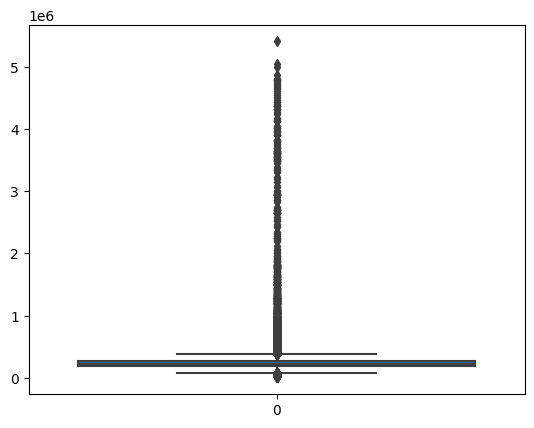

In [16]:
# identify outliers (makes it easier to detect language maybe)
import seaborn as sns
sns.boxplot(test['duration_ms'])

In [17]:

# IQR
Q1 = np.percentile(test['duration_ms'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(test['duration_ms'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

/var/folders/25/15h8p44s3_z09_s99_nxm3480000gn/T/ipykernel_9435/3942683950.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(test['duration_ms'], 25,
/var/folders/25/15h8p44s3_z09_s99_nxm3480000gn/T/ipykernel_9435/3942683950.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(test['duration_ms'], 75,


79040.5

In [18]:
upper = Q3 +1.5*IQR
lower = Q1 - 1.5*IQR

In [19]:
# Above Upper bound
upper=Q3+1.5*IQR
upper_array=np.where(test['duration_ms']>=upper)
print("Upper Bound:",upper)
print(upper_array)
 
#Below Lower bound
lower=Q1-1.5*IQR
lower_array=np.where(test['duration_ms']<=lower)
print("“Lower Bound:”",lower)
print(lower_array)

Upper Bound: 385974.25
(array([    30,     34,     40, ..., 293545, 293572, 293588]),)
“Lower Bound:” 69812.25
(array([    22,     25,    184, ..., 293693, 293695, 293698]),)


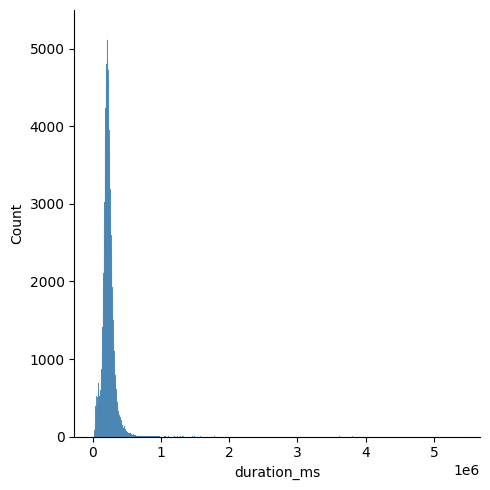

In [20]:
sns.displot(test, x="duration_ms")

In [21]:
print(test.shape)
test.drop(upper_array[0],inplace=True)
test.drop(lower_array[0],inplace=True)
 
print("New Shape: ", test.shape)

(293724, 20)
New Shape:  (277457, 20)


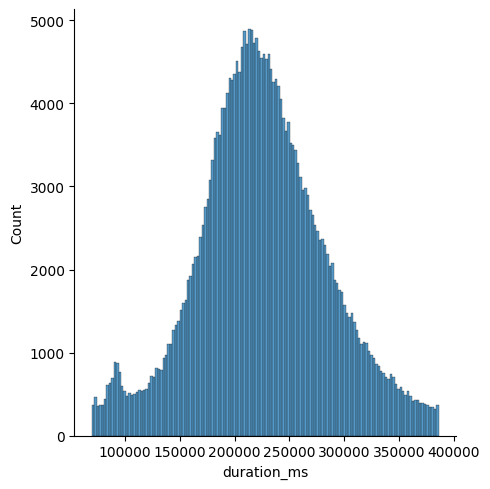

In [22]:
sns.displot(test, x="duration_ms")

In [23]:
# triple check your duration is ok (transform in minutes)
print(test['duration_ms'].max()/60000, test['duration_ms'].min()/60000)

6.4328666666666665 1.16355


In [24]:
# how many above 3.7
print(len(np.where(test['duration_ms']/60000>5)[0])/len(test['duration_ms']))
# how many below 2.5
print(len(np.where(test['duration_ms']/60000<2.5)[0])/len(test['duration_ms']))

0.1061137401471219
0.09105555095023733


I'd say cut anything over 5 (EDM) / under 2.5 (for radio, but tiktok might mess this up. depends on goal really. would probably end up cutting since you still want radio playing songs. let's see what is also in billboard first? be conservative with this cut)

In [25]:
# remove songs under and over a certain treshhold
print(test.shape)
test = test[ (test['duration_ms'] <= (5*60000)) & (test['duration_ms'] >= (2.5*60000))]
print(test.shape)

(277457, 20)
(222751, 20)


In [26]:
# check for nans
np.where(test['duration_ms'].isna())

(array([], dtype=int64),)

## release_date 

In [27]:
test.head()

,id,name,artists,id_artists,release_date,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
0,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,160187,0,0.484,0.265,0,-11.101,1,0.0322,0.394,0.000000,0.149,0.285,113.564,3,56
1,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,['The Toys'],['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,159560,0,0.671,0.867,2,-2.706,1,0.0571,0.436,0.000000,0.139,0.839,120.689,4,41
3,0ZMMtH875IR2TfkyC4PolD,Don't Let the Sun Catch You Crying (Main) - Mono,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,157093,0,0.477,0.352,1,-14.165,1,0.0300,0.406,0.000000,0.122,0.478,106.773,4,34
4,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,187333,0,0.319,0.201,7,-17.796,1,0.0623,0.887,0.000000,0.904,0.239,117.153,3,26
5,19oquvXf3bc65GSqtPYA5S,It Was A Very Good Year - Live At The Sands Ho...,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,236800,0,0.269,0.129,7,-18.168,0,0.0576,0.938,0.000005,0.683,0.160,82.332,3,25


In [28]:
df =  test.copy()
df['release_date']

0        2008-02-11
1        2020-03-13
3        2008-02-11
4        2018-05-04
5        2018-05-04
            ...    
293717   2020-03-03
293718   2020-03-20
293720   2020-10-21
293721   2020-09-02
293723   2015-07-01
Name: release_date, Length: 222751, dtype: datetime64[ns]

<Axes: xlabel='release_date'>

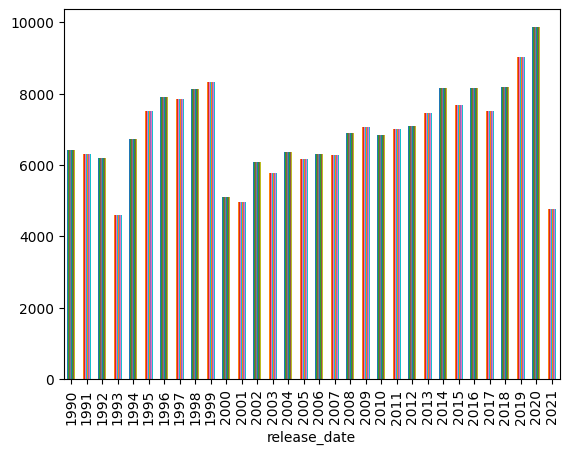

In [29]:
# Analyze by year
df.groupby(df["release_date"].dt.year).count().plot(kind="bar", legend=None)

In [42]:
# double check percentages are ok
print('90s', len(np.where(df['release_date'].dt.year <=1999)[0])/len(df['release_date']))
print('2000s', len(np.where((df['release_date'].dt.year <=2010) & (df['release_date'].dt.year >=2000))[0])/len(df['release_date']))
print('2010s', len(np.where(df['release_date'].dt.year >2010)[0])/len(df['release_date']))

# extra
print('the best years', len(np.where((df['release_date'].dt.year <=2016) & (df['release_date'].dt.year >=2011))[0])/len(df['release_date']))
print('the dead years', len(np.where(df['release_date'].dt.year >=2017)[0])/len(df['release_date']))

90s 0.31410857863713293
2000s 0.3045149067793186
2010s 0.38137651458354843
the best years 0.20466799251181814
the dead years 0.17670852207173032


Seems distrbuted jusst fine. I think there is a big difference between the early 2010s and late 2010 (can probably find articles that verify this, think coachella vs tiktok) if we want to check it out in our analysis (as an extra, or if the 2010s dont give any clear results of popularity)

Might want to even avoid 2021 if we don't then*